# 2D interpolation matrix

This notebook describes how to calculate (and use) a matrix $Q$ that operates on a set of points $M(X, Y)$ to produce another set of points $m(x, y)$ by interpolation. I.e., $m(x, y) = QM(X,Y)$, where $m$ and $M$ are column vectors of size $N_m$ and $N_M$, respectively, and $Q$ is shape $(N_m, N_M)$. The purpose of calcuating the matrix $Q$ is that it is useful in cases where the points $(x, y)$ and $(X, Y)$ are fixed, but $M$ (and $m$) may change. That includes inverse problems where we want to find $M$ (or $m$). 

The approach is to use Scipy's interpolate.RectBivariateSpline class to calculate the effect of each element of $M$ to build up the $Q$ matrix. 

Start by setting up toy coordinates:

In [1]:
import numpy as np
from scipy.interpolate import RectBivariateSpline

X_, Y_ = np.array([0, 1, 2, 3]), np.array([0, 1, 2, 3])
X, Y = np.meshgrid(X_, Y_, indexing = 'ij')

x_, y_ = np.linspace(0, 2.99, 100), np.linspace(0, 2.99, 100)
x, y = [_.flatten() for _ in np.meshgrid(x_, y_)]

# Build matrix Q by evaluating the effect of unit vectors along 
# each dimension of 
Q = np.empty((x.size, X.size))
for i in range(X.size):
    M = np.zeros(X.size)
    M[i] = 1
    spl = RectBivariateSpline(X_, X_, M.reshape(X.shape))

    Q[:, i] = spl.ev(x, y)


Now set up random values for $M$ and apply $Q$ to find $m$. Then plot the results

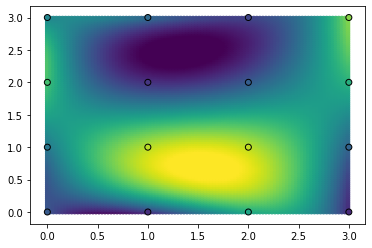

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

M = np.random.random(X.size)
m = Q.dot(M)

fig = plt.figure()
ax = fig.add_subplot(111)
# plot M:
ax.scatter(X.flatten(), Y.flatten(), c = M, vmin = 0, vmax = 1, edgecolors = 'black', zorder = 9)
# and then m:
ax.scatter(x.flatten(), y.flatten(), c = m, vmin = 0, vmax = 1, s = 15 )
plt.show()

